# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [167]:
sinasc_raw = pd.read_csv('data/SINASC/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [168]:
min = sinasc_raw['munResLat'].min(0)

max = sinasc_raw['munResLat'].max(0)

print('min:', min, '\nmax:', max)

print('\n', sinasc_raw.columns)

min: -13.49976 
max: -8.76889

 Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munR

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [169]:
colunas_1 = ['munResLat', 'QTDFILMORT', 'CONSULTAS']

sinasc_1 = sinasc_raw[colunas_1].copy()

#sinasc_1['faixa_lat']
sinasc_1.loc[:, 'faixa_lat'] = pd.cut(sinasc_1['munResLat'],
                                      bins=[-float('inf'),-10.5, float('inf')],
                                      labels=['Abaixo de -10.5', 'Acima de -10.5'])


final = sinasc_1.groupby('faixa_lat', observed=False).agg({
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],  # Operações para a variável 'peso'
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']  # Operações para a variável 'altura'
})

final

QTDFILMORT                                                  \
                       sum      mean  min   max median       std       var   
faixa_lat                                                                    
Abaixo de -10.5     3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317   
Acima de -10.5      3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204   

                CONSULTAS                                               
                      sum      mean min max median       std       var  
faixa_lat                                                               
Abaixo de -10.5     48000  3.694297   1   9    4.0  0.643372  0.413928  
Acima de -10.5      48662  3.467436   1   9    4.0  0.888240  0.788970

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [170]:
colunas_2 = ['munResArea', 'APGAR5', 'PESO']
sinasc_2 = sinasc_raw[colunas_2].copy()

sinasc_2['faixa_mun'] = pd.cut(sinasc_2['munResArea'],
                               bins=[-float('inf'), 3000, float('inf')],
                               labels=['Abaixo de 3000', 'Acima de 3000'])

final = sinasc_2.groupby('faixa_mun', observed=False).agg({
    'APGAR5': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],  # Operações para a variável 'peso'
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']  # Operações para a variável 'altura'
})

final

APGAR5                                                  \
                     sum      mean  min   max median       std       var   
faixa_mun                                                                  
Abaixo de 3000   47560.0  9.130351  0.0  10.0    9.0  0.801124  0.641799   
Acima de 3000   199579.0  9.190836  0.0  10.0    9.0  0.787591  0.620299   

                    PESO                                              \
                     sum         mean  min   max  median         std   
faixa_mun                                                              
Abaixo de 3000  16796616  3218.359073  258  5720  3245.0  531.583103   
Acima de 3000   70857126  3249.134538  292  5985  3280.0  547.716582   

                               
                          var  
faixa_mun                      
Abaixo de 3000  282580.595074  
Acima de 3000   299993.453720

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [171]:
min = sinasc_raw['munResAlt'].min(0)

max = sinasc_raw['munResAlt'].max(0)

print('min:', min, '\nmax:', max)

min: 85.0 
max: 595.0


In [172]:
colunas_3 = ['munResAlt', 'IDADEPAI', 'IDADEMAE']
sinasc_3 = sinasc_raw[colunas_3].copy()

sinasc_3['faixa_alt'] = pd.cut(sinasc_3['munResAlt'], bins=[-float('inf'), 300, float('inf')], labels=['<300', '>=300'])

final = sinasc_3.groupby('faixa_alt', observed=False).agg({
    'IDADEPAI': ['mean', 'min', 'max', 'median', 'std', 'var'],  # Operações para a variável 'peso'
    'IDADEMAE': ['mean', 'min', 'max', 'median', 'std', 'var']  # Operações para a variável 'altura'
})

final

IDADEPAI                                           IDADEMAE      \
                mean   min   max median       std        var       mean min   
faixa_alt                                                                     
<300       31.115340  15.0  86.0   30.0  7.811789  61.024041  26.072983  11   
>=300      30.868657  16.0  60.0   30.0  7.336911  53.830257  26.299156  13   

                                           
          max median       std        var  
faixa_alt                                  
<300       53   26.0  6.389851  40.830200  
>=300      53   26.0  6.358600  40.431789

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [173]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

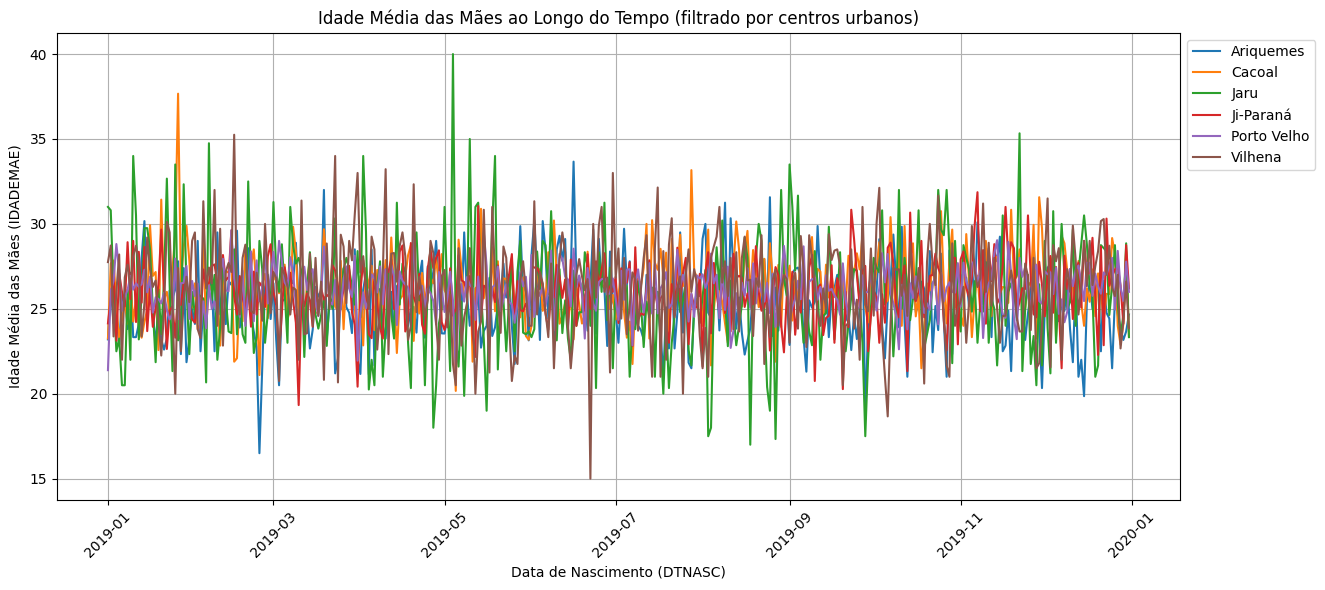

In [174]:
colunas_4 = ['munResNome', 'IDADEMAE', 'DTNASC']

sinasc_4 = sinasc_raw[colunas_4].copy()
sinasc_4['imediata'] = sinasc_4['munResNome'].map(imediatas)

colunas_4 = ['imediata', 'IDADEMAE', 'DTNASC']
sinasc_4 = sinasc_4[colunas_4].copy()

# converter coluna de datas para formato correspondente
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])

sinasc_agrupado = sinasc_4.groupby(['DTNASC', 'imediata'])['IDADEMAE'].mean().reset_index()

plt.figure(figsize=(12, 6))

for imediata in sinasc_agrupado['imediata'].unique():
    dados_filtrados = sinasc_agrupado[sinasc_agrupado['imediata'] == imediata]
    plt.plot(dados_filtrados['DTNASC'], dados_filtrados['IDADEMAE'], label=imediata)

# Customizando o gráfico
plt.title('Idade Média das Mães ao Longo do Tempo (filtrado por centros urbanos)')
plt.xlabel('Data de Nascimento (DTNASC)')
plt.ylabel('Idade Média das Mães (IDADEMAE)')
plt.xticks(rotation=45)  # Rotacionar os rótulos das datas para melhor visualização
plt.legend(title='Centros Urbanos')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [175]:
sinasc_agrupado['imediata'].unique()

array(['Ariquemes', 'Cacoal', 'Jaru', 'Ji-Paraná', 'Porto Velho',
       'Vilhena'], dtype=object)

Mas esse gráfico está muito bagunçado, certo? No caso desse exercício fizemos uma demonstração das funções groupby() e agg(). Também é possível fazer plotagem de regiões imediatas específicas, assim diminuindo a poluição visual! Veja um exemplo:

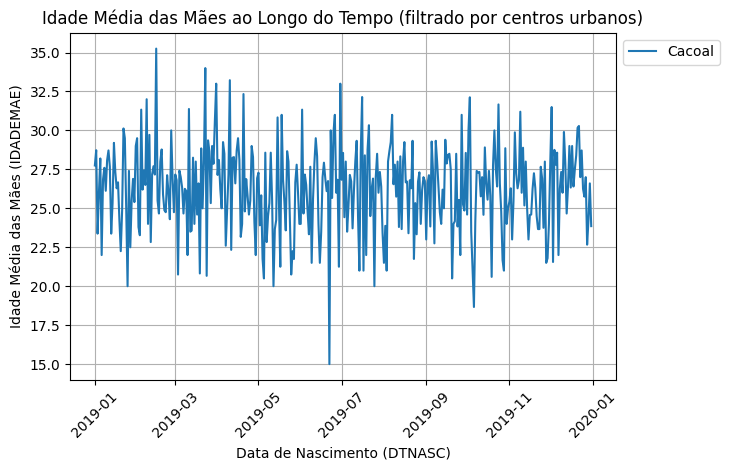

In [176]:
sinasc_agrupado = sinasc_agrupado[sinasc_agrupado['imediata'] == 'Cacoal'].copy()

plt.plot(sinasc_agrupado['DTNASC'], dados_filtrados['IDADEMAE'], label=['Cacoal'])

# Customizando o gráfico
plt.title('Idade Média das Mães ao Longo do Tempo (filtrado por centros urbanos)')
plt.xlabel('Data de Nascimento (DTNASC)')
plt.ylabel('Idade Média das Mães (IDADEMAE)')
plt.xticks(rotation=45)  # Rotacionar os rótulos das datas para melhor visualização
plt.legend(title='Centros Urbanos')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [177]:
idh_HTML = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M', skiprows=1)

In [178]:
# foram encontradas 4 tabelas
dataset_IDH = idh_HTML
dataset_IDH = dataset_IDH[0] #selecionar apenas a primeira
dataset_IDH.head(5)

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto,IDH-M muito alto
,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município
0,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
1,1,Porto Velho,0.736,0.764,0.819,0.638
2,2,Vilhena,0.731,0.734,0.808,0.659
3,3,Cacoal,0.718,0.727,0.821,0.620
4,4,Ji-Paraná,0.714,0.728,0.810,0.617


In [179]:
# corrigir os títulos das colunas
dataset_IDH.columns = ['Posição', 'Município', 'IDH_Municipal', 'IDH Renda', 'IDH Longevidade', 'IDH Educação']

# criar uma categorização de IDH
dataset_IDH['Posição'] = pd.to_numeric(dataset_IDH['Posição'], errors='coerce') # transforma as strings dessa coluna para NaN
dataset_IDH.dropna(subset=['Posição'], inplace=True) # remove as linhas que possuiam algum texto, removendo assim as linhas de categorização

dataset_IDH.iloc[range(0,9),]

,Posição,Município,IDH_Municipal,IDH Renda,IDH Longevidade,IDH Educação
1,1.0,Porto Velho,0.736,0.764,0.819,0.638
2,2.0,Vilhena,0.731,0.734,0.808,0.659
3,3.0,Cacoal,0.718,0.727,0.821,0.620
4,4.0,Ji-Paraná,0.714,0.728,0.810,0.617
5,5.0,Pimenta Bueno,0.710,0.726,0.803,0.613
6,6.0,Ariquemes,0.702,0.716,0.806,0.600
7,7.0,Rolim de Moura,0.700,0.709,0.808,0.598
9,8.0,Cerejeiras,0.692,0.688,0.799,0.602
10,9.0,Jaru,0.689,0.687,0.825,0.577


In [180]:
# feita a limpeza, vamos agora categorizar os dados
dataset_IDH['IDH_Municipal'] = pd.to_numeric(dataset_IDH['IDH_Municipal'], errors='coerce')

# categorias de IDH
bins = [0, 0.499, 0.599, 0.699, 0.799, 1.0]
labels = ['IDH muito baixo', 'IDH baixo', 'IDH médio', 'IDH alto', 'IDH muito alto']

dataset_IDH['Categoria'] = pd.cut(dataset_IDH['IDH_Municipal'],
                                  bins=bins,
                                  labels=labels,
                                  include_lowest=True)

# include_lowest=True foi incluído para garantir que sejam puxados também os valores míninmos

dataset_IDH.iloc[range(0,9),]

,Posição,Município,IDH_Municipal,IDH Renda,IDH Longevidade,IDH Educação,Categoria
1,1.0,Porto Velho,0.736,0.764,0.819,0.638,IDH alto
2,2.0,Vilhena,0.731,0.734,0.808,0.659,IDH alto
3,3.0,Cacoal,0.718,0.727,0.821,0.620,IDH alto
4,4.0,Ji-Paraná,0.714,0.728,0.810,0.617,IDH alto
5,5.0,Pimenta Bueno,0.710,0.726,0.803,0.613,IDH alto
6,6.0,Ariquemes,0.702,0.716,0.806,0.600,IDH alto
7,7.0,Rolim de Moura,0.700,0.709,0.808,0.598,IDH alto
9,8.0,Cerejeiras,0.692,0.688,0.799,0.602,IDH médio
10,9.0,Jaru,0.689,0.687,0.825,0.577,IDH médio


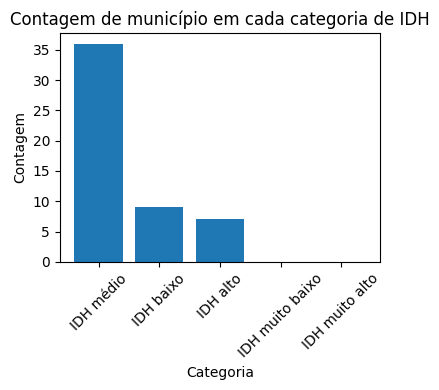

In [181]:
plt.figure(figsize=(4,4))

contagem_categorias = dataset_IDH['Categoria'].value_counts()

plt.bar(data=contagem_categorias,
        x=contagem_categorias.index,
        height=contagem_categorias.values
        )

# Customizando o gráfico
plt.title('Contagem de município em cada categoria de IDH')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotacionar os rótulos das datas para melhor visualização
plt.tight_layout()
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [182]:
IFDM_HTML = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM', skiprows=0)
len(IFDM_HTML) # foram encontradas 3 tabelas

3

In [183]:
dataset_IFDM = IFDM_HTML
dataset_IFDM = dataset_IFDM[0] #selecionar apenas a primeira
dataset_IFDM.head(5)

,Posição,Município,IFDM Consolidado (2013)
,Desenvolvimento alto,Desenvolvimento alto,Desenvolvimento alto
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383


In [184]:
# corrigir os títulos das colunas
dataset_IFDM.columns = ['Posição', 'Município', 'IFDM_Consolidado_2013']

# Remover o caractere 'º' da coluna 'Posição'
dataset_IFDM['Posição'] = dataset_IFDM['Posição'].str.replace('º', '', regex=False)

# criar uma categorização de IFDM
dataset_IFDM['Posição'] = pd.to_numeric(dataset_IFDM['Posição'], errors='coerce') # transforma as strings dessa coluna para NaN
dataset_IFDM.dropna(subset=['Posição'], inplace=True) # remove as linhas que possuiam algum NaN, removendo assim as linhas de categorização

dataset_IFDM.iloc[range(0,9),]

,Posição,Município,IFDM_Consolidado_2013
2,1.0,Ariquemes,0.7746
3,2.0,Vilhena,0.7465
4,3.0,Pimenta Bueno,0.7383
5,4.0,Porto Velho,0.7257
6,5.0,Ji-Paraná,0.7117
7,6.0,Cacoal,0.7111
8,7.0,Santa Luzia d'Oeste,0.6850
9,8.0,Rolim de Moura,0.6785
10,9.0,Chupinguaia,0.6766


In [185]:
# feita a limpeza, vamos agora categorizar os dados
dataset_IFDM['IFDM_Consolidado_2013'] = pd.to_numeric(dataset_IFDM['IFDM_Consolidado_2013'], errors='coerce')

# categorias de IDH
bins = [0, 0.4, 0.6, 0.8, 1]
labels = ['Baixo', 'Regular', 'Moderado', 'Alto']

dataset_IFDM['Categoria'] = pd.cut(dataset_IFDM['IFDM_Consolidado_2013'],
                                  bins=bins,
                                  labels=labels,
                                  include_lowest=True)

# include_lowest=True foi incluído para garantir que sejam puxados também os valores míninmos

dataset_IFDM.iloc[range(0,15),]

,Posição,Município,IFDM_Consolidado_2013,Categoria
2,1.0,Ariquemes,0.7746,Moderado
3,2.0,Vilhena,0.7465,Moderado
4,3.0,Pimenta Bueno,0.7383,Moderado
5,4.0,Porto Velho,0.7257,Moderado
6,5.0,Ji-Paraná,0.7117,Moderado
7,6.0,Cacoal,0.7111,Moderado
8,7.0,Santa Luzia d'Oeste,0.6850,Moderado
9,8.0,Rolim de Moura,0.6785,Moderado
10,9.0,Chupinguaia,0.6766,Moderado
11,10.0,São Miguel do Guaporé,0.6699,Moderado


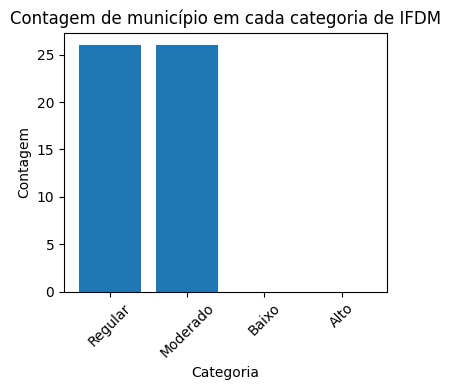

In [186]:
plt.figure(figsize=(4,4))

contagem_categorias = dataset_IFDM['Categoria'].value_counts()

plt.bar(data=contagem_categorias,
        x=contagem_categorias.index,
        height=contagem_categorias.values
        )

# Customizando o gráfico
plt.title('Contagem de município em cada categoria de IFDM')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotacionar os rótulos das datas para melhor visualização
plt.tight_layout()
plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [187]:
PIB_HTML = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB', skiprows=0)
len(PIB_HTML) # foram encontradas 9 tabelas, vamos utilizar as 6 primeiras

9

In [188]:
dataset_PIB = PIB_HTML

# juntando as 6 tabelas que constam na página da wikipedia. Note que o número de linhas está exatamente igual
# ao que se espera, o que indica que os dados foram importados com sucesso
dataset_PIB = pd.concat([dataset_PIB[0],
           dataset_PIB[1],
           dataset_PIB[2],
           dataset_PIB[3],
           dataset_PIB[4],
           dataset_PIB[5]],
           axis=0,
           join='outer',
           ignore_index=True)

# algumas das colunas não serão utilizadas
dataset_PIB = dataset_PIB[['Município', 'PIB']]
dataset_PIB.columns = ['Município', 'PIB']

dataset_PIB.iloc[range(0,10)] # agora temos os dados limpinhos :D :D :D

,Município,PIB
0,Porto Velho,17 912 070
1,Ji-Paraná,3 783 972
2,Vilhena,2 831 175
3,Ariquemes,2 579 830
4,Cacoal,2 261 644
5,Jaru,1 500 890
6,Rolim de Moura,1 283 434
7,Pimenta Bueno,1 164 877
8,Guajará-Mirim,893 000
9,Ouro Preto do Oeste,834 000


In [189]:
dataset_PIB['PIB'].dtypes # objetos? precisamos de números! Vejamos os passos seguintes

dtype('O')

In [190]:
# feita a limpeza, vamos agora categorizar os dados

# transformar os valores de PIB em numéricos

dataset_PIB['PIB'] = dataset_PIB['PIB'].str.replace(' ', '', regex=False)
dataset_PIB['PIB'] = pd.to_numeric(dataset_PIB['PIB'])

# categorias de PIB
bins = [0, 100000, 200000, 300000, 500000, 1000000, float('inf')]
labels = ['Até 100 Milhões',
          'Acima de 100 Milhões',
          'Acima de 200 Milhões',
          'Acima de 300 Milhões',
          'Acima de 500 Milhões',
          'Acima de 1 Bilhão']

# criação da coluna de categorias
dataset_PIB['Categoria'] = pd.cut(dataset_PIB['PIB'],
                                  bins=bins,
                                  labels=labels,
                                  include_lowest=True)

# include_lowest=True foi incluído para garantir que sejam puxados também os valores míninmos

dataset_PIB.iloc[range(0,9),]

,Município,PIB,Categoria
0,Porto Velho,17912070,Acima de 1 Bilhão
1,Ji-Paraná,3783972,Acima de 1 Bilhão
2,Vilhena,2831175,Acima de 1 Bilhão
3,Ariquemes,2579830,Acima de 1 Bilhão
4,Cacoal,2261644,Acima de 1 Bilhão
5,Jaru,1500890,Acima de 1 Bilhão
6,Rolim de Moura,1283434,Acima de 1 Bilhão
7,Pimenta Bueno,1164877,Acima de 1 Bilhão
8,Guajará-Mirim,893000,Acima de 500 Milhões


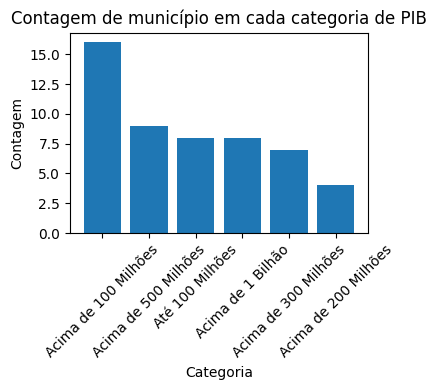

In [195]:
plt.figure(figsize=(4,4))

contagem_categorias = dataset_PIB['Categoria'].value_counts()

plt.bar(data=contagem_categorias,
        x=contagem_categorias.index,
        height=contagem_categorias.values
        )

# Customizando o gráfico
plt.title('Contagem de município em cada categoria de PIB')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotacionar os rótulos das datas para melhor visualização
plt.tight_layout()
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Com o tratamento dos dados e com a geração dos gráficos, foi possível identificar alguns pontos:
    - Não existe nenhuma cidade que possua IDH nas categorias muito alto e também muito baixo;
    - Não existe nenhuma cidade que possua IFDM nas categorias alto e baixo.

Tais indicadores são reflexo direto do nível de urbanização e infraestrutura das cidades do Estado de Rondônia, que, por mais que em alguns pontos centrais seja mais alto, tem um contraponto em outras regiões.